<a href="https://colab.research.google.com/github/Acabre21/machineLearning/blob/master/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem 1: 


In [0]:
import numpy as np
import random as random
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
%tensorflow_version 2.x
import tensorflow as tf
plt.style.use('seaborn-whitegrid')

In [0]:
def get_random_data(w, b, mu, sigma, m):
  data = np.zeros((m,2))
  labels = np.zeros((m,1))
  
  # populating the arrays
  for i in range(0,m):
    # 50/50 chance of a 1 or a 0
    c = np.random.uniform(0,1)
    if c > 0.5:
      c = 1
    else:
      c = 0

    # initializing the features
    x1 = np.random.uniform()
    n = np.random.normal(mu,sigma)
    x2 = w * x1 + b + (-1)**c * n

    data[i][0] = x1
    data[i][1] = x2
    labels[i] = c
  
  return data, labels 

In [0]:
def display_random_data(data, labels, w, b):
  mpl.rc('axes', labelsize=14)
  mpl.rc('xtick', labelsize=12)
  mpl.rc('ytick', labelsize=12)

  # plotting a red point when the label is 1 and blue for 0
  for i in range(0,len(data)):
    if labels[i] == 1:
      plt.plot(data[i][0], data[i][1], "r.")
    else:
      plt.plot(data[i][0], data[i][1], "b.") 

  # plotting the line of best fit
  xline = np.linspace(0, 1, 100)
  yline = w * xline + b
  plt.plot(xline, yline, '-k')
  plt.axis([0, 1, -15, 15])
  plt.show()

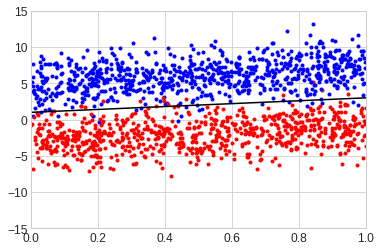

In [18]:
# main code for problem 1

#splitting the randomly generated data 80/20
data, labels = get_random_data(2,1,4,2,2000)
trainingData = data[:1600]
trainingLabels = labels[:1600]
testingData = data[400:]
testingLabels = labels[400:]

display_random_data(trainingData, trainingLabels, 2, 1)

Problem 2: 

In [0]:
# pulled from imdb_movie_reviews_classification_dense_layers.ipynb
def build_and_compile_model():
    # build model
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # compile model
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])
    
    return model

In [0]:
# main for problem 2

#splitting the randomly generated data 80/20
data, labels = get_random_data(2,1,4,2,2000)
trainingData = data[:1600]
trainingLabels = labels[:1600]
testingData = data[400:]
testingLabels = labels[400:]

# building and training the model
model = build_and_compile_model()
history = model.fit(trainingData,
                    trainingLabels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(testingData, testingLabels))


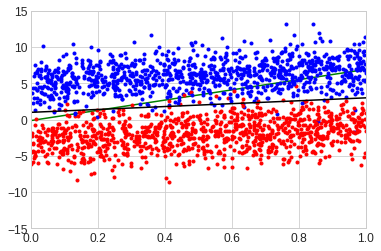

In [27]:
# getting the weights and the bias
weights = model.layers[0].get_weights()
b = weights[1][0]
x1Weight = weights[0][0]
x2Weight = weights[0][1]

# plotting the seperating line generated by the trained model in green 
# along with the true line in black
x = np.linspace(0.0, 1.0, 100)
y = (-(b / x2Weight) / (b / x1Weight)) * x + (-b / x2Weight)
plt.plot(x, y, color = "green")
display_random_data(data, labels, 2, 1)

Problem 3:

In [0]:
def logisticRegression(data, labels):
  epochs = len(data)
  lr = 0.01

  # initial value for weight w and bias b
  w = np.random.randn(1)
  b = np.zeros(1)

  # stochastic gradient descent, going through one label at a time
  for i in range(epochs):
    #activation function
    z = w * data[i][0] + w * data[i][1] + b
    # probability 
    a = 1/ (1 + np.exp(-z))

    # gradient of the cross-entropy loss function
    gradWeight = (a - labels[i]) * data[i][0] + (a - labels[i]) * data[i][1] 
    gradBias = a - labels[i]

    # finding the next weight and bias to test
    w = w -(lr * gradWeight)
    b = b -(lr * gradBias)
  return w,b

In [0]:
def display_logistic_data_heat(data, w, b, threshold):
  hmap = np.zeros((len(data), 2))
  for i in range(len(data)):
    z = w * data[i][0] + w * data[i][1] + b
    a = 1/ (1 + np.exp(-z))
    hmap[i][0]= i
    hmap[i][1]= a
  heat = sb.heatmap(hmap, xticklabels=False, yticklabels=False)
  plt.show()

In [0]:
def accuracy(data, labels, w, b, threshold):
  correct = 0

  for i in range(len(data)):
    z = w * data[i][0] + w * data[i][1] + b
    a = 1/ (1 + np.exp(-z))
    if a >= threshold:
      a = 1
    else:
      a = 0

    if labels[i]==a:
      correct+=1
  return correct/len(data)

In [0]:
def loss(data, labels, w, b, threshold):
  sum = 0
  for i in range(len(data)):
    z = w * data[i][0] + w * data[i][1] + b
    a = 1/ (1 + np.exp(-z))
    sum += labels[i] - a
  return sum/len(data)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sb

# splitting the randomly generated data
data, labels = get_random_data(1,1,4,2,2000)
trainingData = data[:1600]
trainingLabels = labels[:1600]
testingData = data[400:]
testingLabels = labels[400:]
# training the model
predWeight, predBias = logisticRegression(trainingData, trainingLabels)

threshold = 0.5

# outputting the heatmap, accuracy, and loss
# I'm not sure why my heatmap looks weird like that
display_logistic_data_heat(testingData, predWeight, predBias, threshold)
a = accuracy(testingData, testingLabels, predWeight, predBias, threshold)
l = loss(testingData, testingLabels, predWeight, predBias, threshold)

print("Accuracy: "+ str(a));
print("Average loss: " + str(l))

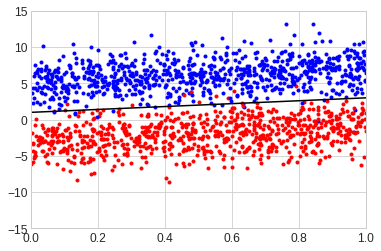

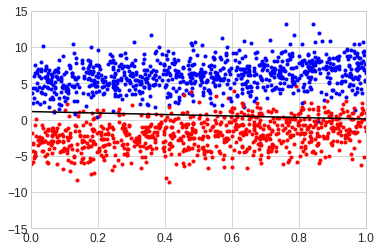

In [29]:
# displaying the true line
display_random_data(testingData, testingLabels, 2, 1)

# displaying the seperating line created by the trained model
display_random_data(testingData, testingLabels, predWeight, predBias)